In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [215]:
df = pd.read_csv('avocado.csv')

In [216]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [217]:
df.shape

(18249, 14)

In [218]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [219]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [220]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [221]:
df.duplicated().sum()

np.int64(0)

In [222]:
df.rename(columns={'4046':'Small_Hass',
           '4225':'Large_Hass',
           '4770':'Extralarge_Hass'},inplace=True)

In [223]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small_Hass', 'Large_Hass',
       'Extralarge_Hass', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [224]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [225]:
df.to_csv("Mid.csv",index = False)

In [226]:
df = pd.read_csv('Mid.csv')
df.describe()

,AveragePrice,Total Volume,Small_Hass,Large_Hass,Extralarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [227]:
d = df.copy()

In [228]:
from scipy.stats import zscore
z =np.abs(zscore(d['AveragePrice']))
print(z)
print(np.where(z<3))
dn=d[(z<3)]
print('Shape of New Dataframe dn:',dn.shape)

0        0.188689
1        0.139020
2        1.182069
3        0.809551
4        0.312861
           ...   
18244    0.556347
18245    0.755023
18246    1.152375
18247    1.301382
18248    0.531512
Name: AveragePrice, Length: 18249, dtype: float64
(array([    0,     1,     2, ..., 18246, 18247, 18248]),)
Shape of New Dataframe dn: (18118, 13)


In [229]:
z =np.abs(zscore(dn['Large_Hass']))
print(z)
print(np.where(z<3))
dn1=dn[(z<3)]
print('Shape of New Dataframe dn1:',dn1.shape)

0        0.200956
1        0.209081
2        0.155686
3        0.186454
4        0.209744
           ...   
18244    0.244763
18245    0.243188
18246    0.243998
18247    0.243561
18248    0.244078
Name: Large_Hass, Length: 18118, dtype: float64
(array([    0,     1,     2, ..., 18115, 18116, 18117]),)
Shape of New Dataframe dn1: (17939, 13)


In [230]:
z =np.abs(zscore(dn1['Total Bags']))
print(z)
print(np.where(z<3))
dn2=dn1[(z<3)]
print('Shape of New Dataframe dn2:',dn2.shape)


0        0.404498
1        0.402283
2        0.406009
3        0.412404
4        0.411383
           ...   
18244    0.391342
18245    0.402942
18246    0.402588
18247    0.398271
18248    0.395409
Name: Total Bags, Length: 17939, dtype: float64
(array([    0,     1,     2, ..., 17936, 17937, 17938]),)
Shape of New Dataframe dn2: (17455, 13)


In [231]:
z =np.abs(zscore(dn2['Small Bags']))
print(z)
print(np.where(z<3))
dn3=dn2[(z<3)]
print('Shape of New Dataframe dn3:',dn3.shape)


0        0.448821
1        0.443970
2        0.452207
3        0.466468
4        0.464605
           ...   
18244    0.421906
18245    0.446792
18246    0.444309
18247    0.434855
18248    0.428411
Name: Small Bags, Length: 17455, dtype: float64
(array([    0,     1,     2, ..., 17452, 17453, 17454]),)
Shape of New Dataframe dn3: (16841, 13)


In [232]:
z =np.abs(zscore(dn3['XLarge Bags']))
print(z)
print(np.where(z<3))
dn4=dn3[(z<3)]
print('Shape of New Dataframe dn4:',dn4.shape)


0        0.210982
1        0.210982
2        0.210982
3        0.210982
4        0.210982
           ...   
18244    0.210982
18245    0.210982
18246    0.210982
18247    0.210982
18248    0.210982
Name: XLarge Bags, Length: 16841, dtype: float64
(array([    0,     1,     2, ..., 16838, 16839, 16840]),)
Shape of New Dataframe dn4: (16616, 13)


In [233]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Date,AveragePrice,Total Volume,Small_Hass,Large_Hass,Extralarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Total Unit Sold Small_Hass: year
2015    1709.449981
2016    1525.122892
2017    1652.038132
2018     460.499734
Name: Small_Hass, dtype: float64


Total Unit Sold Large_Hass: year
2015    1761.054036
2016    1672.728288
2017    1544.734720
2018     407.758674
Name: Large_Hass, dtype: float64


Total Unit Sold Extralarge_Hass: year
2015    142.772395
2016    159.879845
2017     91.217508
2018     22.932595
Name: Extralarge_Hass, dtype: float64


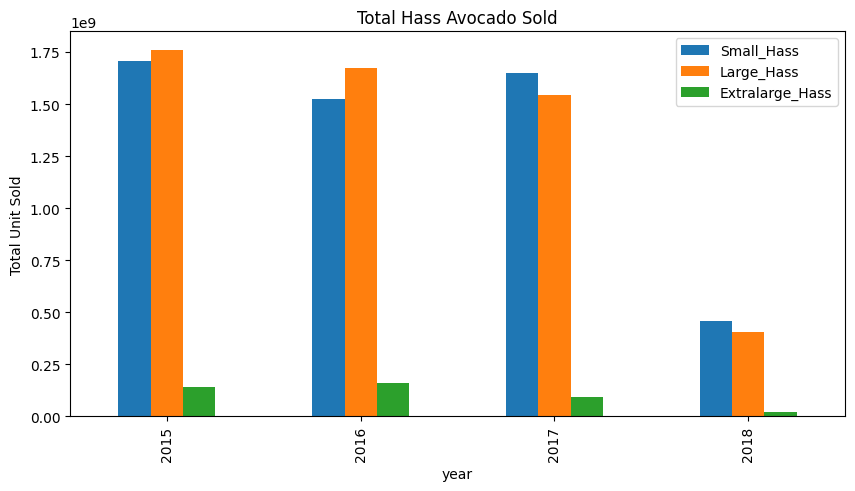

In [234]:
d2=d.copy()
d2.drop(['Date','AveragePrice','Total Volume','region','Total Bags','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)
d2.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Hass Avocado Sold')
plt.ylabel('Total Unit Sold')
print('Total Unit Sold Small_Hass:',(df.groupby(['year'])['Small_Hass'].sum())/1000000)
print('\n')
print('Total Unit Sold Large_Hass:',(df.groupby(['year'])['Large_Hass'].sum())/1000000)
print('\n')
print('Total Unit Sold Extralarge_Hass:',(df.groupby(['year'])['Extralarge_Hass'].sum())/1000000)
plt.show()

Total Small Bags sold (in Million): year
2015     634.682705
2016    1106.494240
2017    1222.952525
2018     360.741368
Name: Small Bags, dtype: float64


Total Large Bags sold (in Million): year
2015    132.066400
2016    336.626342
2017    399.339040
2018    123.583988
Name: Large Bags, dtype: float64


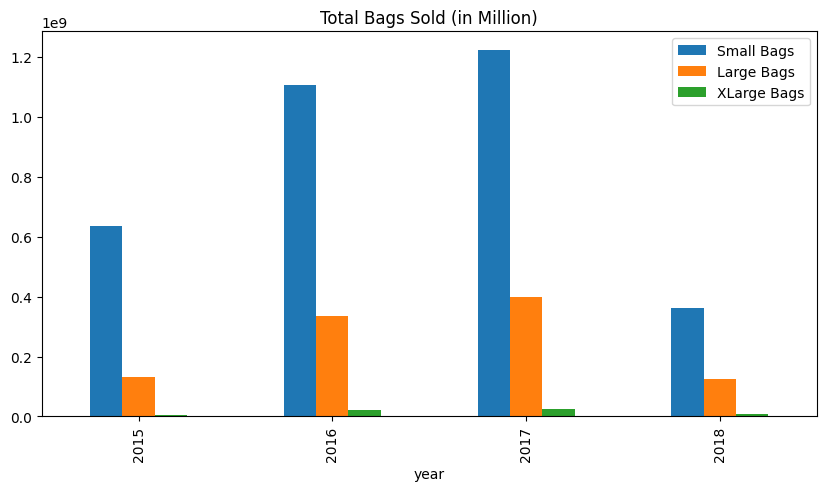

In [235]:
d3=d.copy()
d3.drop(['Date','AveragePrice','Total Volume','Small_Hass','Large_Hass','Extralarge_Hass','region','Total Bags'],axis=1,inplace=True)
d3.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Bags Sold (in Million)')
print('Total Small Bags sold (in Million):',(df.groupby(['year'])['Small Bags'].sum())/1000000)
print('\n')
print('Total Large Bags sold (in Million):',(df.groupby(['year'])['Large Bags'].sum())/1000000)

In [236]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [237]:
x=df['type'].unique()
x

array(['conventional', 'organic'], dtype=object)

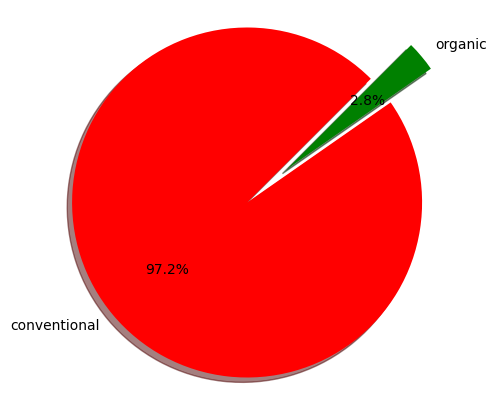

In [238]:
x=['conventional','organic']
y=df.groupby('type')['Total Volume'].sum()
plt.figure(figsize=(5,5))
colors=['red','green']
plt.pie(y,labels=x,shadow=True,colors=colors,explode=(0.3,0),autopct='%1.1f%%',startangle=45)
plt.axis('equal')
plt.show()

<Figure size 900x700 with 0 Axes>

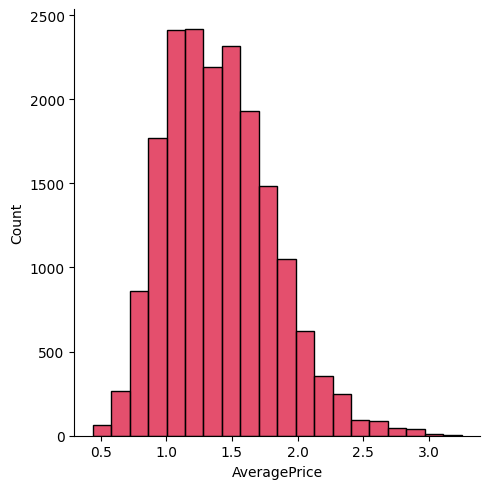

In [239]:
plt.figure(figsize=(9,7),dpi=100)
sns.displot(df['AveragePrice'],kind='hist',bins=20,color="crimson",label="Average Price")
plt.show()

<Figure size 2000x1000 with 0 Axes>

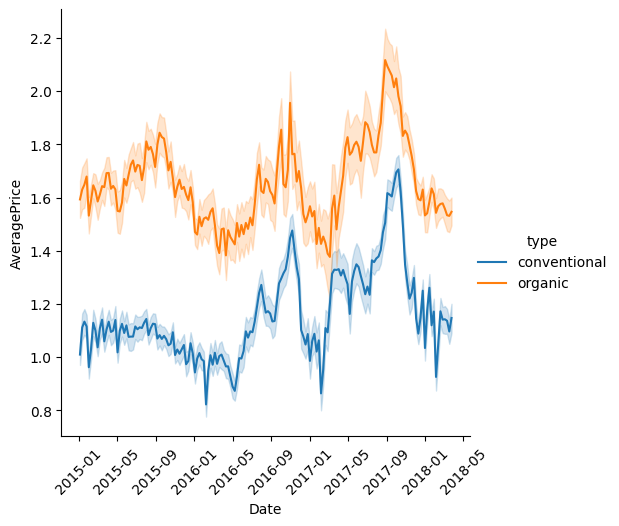

In [240]:
plt.figure(figsize=(20,10))
sns.relplot(x="Date",y="AveragePrice",hue="type",kind="line",data=df)
plt.xticks(rotation=45)
plt.show()

In [241]:
df.drop(columns=["Date"],inplace=True)

In [242]:
le = LabelEncoder() 
df['type']= le.fit_transform(df['type']) 

In [243]:
df['region'] = pd.Categorical(df['region'])
df_region = pd.get_dummies(df['region'], prefix = 'region')
df_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18246,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18247,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [244]:
df = pd.concat([df, df_region], axis=1)
df.drop(columns="region",inplace=True)

In [245]:
df['Month'] = pd.Categorical(df['Month'])
df_month = pd.get_dummies(df['Month'], prefix = 'month')
df_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,True,False,False,False,False,False,False,False,False,False,False
18245,True,False,False,False,False,False,False,False,False,False,False,False
18246,True,False,False,False,False,False,False,False,False,False,False,False
18247,True,False,False,False,False,False,False,False,False,False,False,False


In [246]:
df = pd.concat([df, df_month], axis=1)
df.drop(columns="Month",inplace=True)
df

,AveragePrice,Total Volume,Small_Hass,Large_Hass,Extralarge_Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,False,False,False,False,False,False,False,False,False,True
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,False,False,False,False,False,False,False,False,False,True
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,False,False,False,False,False,False,False,False,False,True
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,False,False,False,False,False,False,False,False,False,True
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,False,False,False,False,False,False,False,False,False,False
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,False,False,False,False,False,False,False,False,False,False
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,False,False,False,False,False,False,False,False,False,False
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,False,False,False,False,False,False,False,False,False,False


In [247]:
df.to_csv("Final.csv",index = False)

In [248]:
df = pd.read_csv('Final.csv')
X=df.iloc[:,1:78]                 
y=df['AveragePrice']

In [249]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
y_test = np.array(y_test,dtype = float)

In [250]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14599, 77)
(3650, 77)
(14599,)
(3650,)


In [251]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [252]:
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [253]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(y_pred)

[1.15102808 1.13222925 1.38320582 ... 1.18667261 1.86230127 1.58410303]


In [254]:
new_df_lr = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
new_df_lr

,Actual,Predicted
0,1.04,1.151028
1,0.98,1.132229
2,1.39,1.383206
3,1.87,1.860257
4,1.97,1.716458
...,...,...
3645,1.45,1.195706
3646,1.89,1.389553
3647,0.95,1.186673
3648,1.51,1.862301


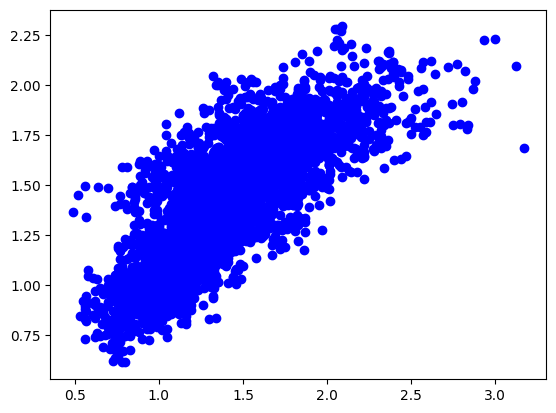

In [255]:
plt.scatter(x=y_test,y=y_pred,color='b')
plt.show()

In [256]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.18617574048794772
MSE: 0.06007010270934262
RMSE: 0.2450920290612133


In [257]:

acc_lr=r2_score(y_test,y_pred)
print(acc_lr)

0.6217330509756727


In [258]:
dtr=DecisionTreeRegressor(random_state=3)
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

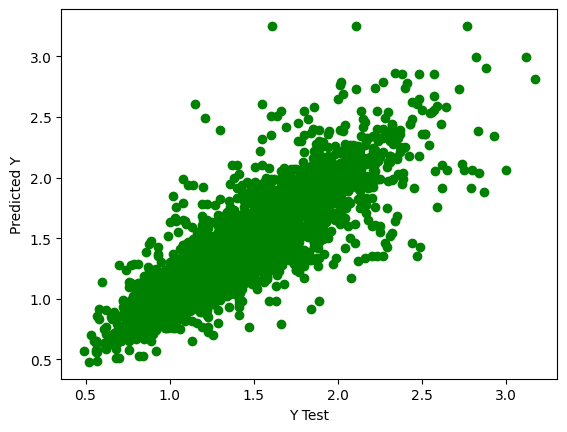

In [259]:
plt.scatter(x=y_test,y=pred,color='g')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [260]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.13153698630136987
MSE: 0.04094720547945205
RMSE: 0.2023541585425218


In [261]:
acc_dtr=r2_score(y_test,pred)
acc_dtr

0.7421516896228717

In [262]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(n_estimators=150,max_features='log2',random_state=42)
rdr.fit(X_train,y_train)
pred1=rdr.predict(X_test)

In [263]:
print('MAE:', mean_absolute_error(y_test, pred1))
print('MSE:', mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred1)))

MAE: 0.09958479999999999
MSE: 0.019079331259957383
RMSE: 0.13812795249317708


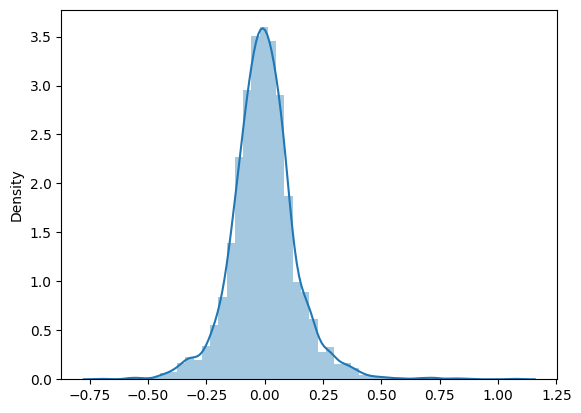

In [264]:
sns.distplot((y_test-pred1),bins=50)
plt.show()

,Y Test,Pred
0,1.04,1.065133
1,0.98,1.035333
2,1.39,1.411867
3,1.87,1.869933
4,1.97,1.864600


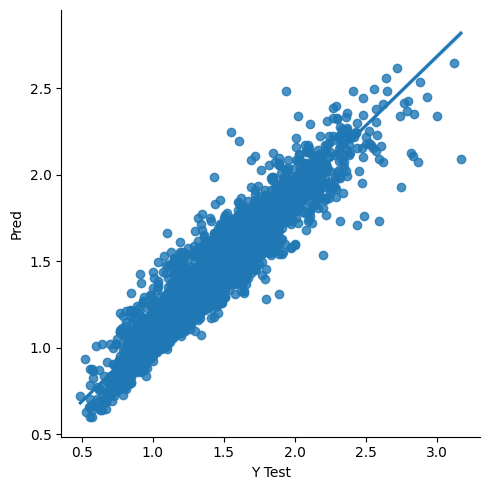

In [265]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred1},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='viridis')
data.head()

In [266]:
acc_rdr=r2_score(y_test,pred1)
acc_rdr

0.879855700263251

In [267]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib
data = pd.read_csv("avocado.csv")
region_encoder = LabelEncoder()
data['region'] = region_encoder.fit_transform(data['region']) 
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day_of_week'] = data['Date'].dt.dayofweek
X = data[['year', 'month', 'day_of_week', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'region']]
y = data['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf_model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=3, scoring='neg_mean_absolute_error', 
                                   verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")
joblib.dump(best_rf_model, 'random_forest_model.pkl')
joblib.dump(region_encoder, 'region_encoder.pkl')

print("Model and encoder saved as 'random_forest_model.pkl' and 'region_encoder.pkl'")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Mean Absolute Error: 0.10
R² Score: 0.89
Model and encoder saved as 'best_random_forest_model.pkl' and 'region_encoder.pkl'
